# 02467 Computational Social Science
## Assignment 2
### Group 15

Our GitHub repo is availabe at: https://github.com/Simo067m/ComSocSci-Assignments <br>
Contribution:
- s233304 : Part 1 + 2
- s214592 : Part 3
- s204133 : Part 1 + 2

In [3]:
# Import packages
import nltk
import ast
import json
import wordcloud
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from netwulf import visualize
from networkx.readwrite import json_graph
from joblib import Parallel, delayed

## Part 1: Properties of the real-world network of Computational Social Scientists

In [5]:
def read_json_network(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

> __Exercise: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 

In [14]:
G = read_json_network("graph.json")

N = G.number_of_nodes()
L = G.number_of_edges()
L_max = N*(N-1)//2
p  = L/L_max # (3.2)
d_avg = p*(N-1) # (3.3)

print(f"""
Nodes:       {N}
Connections: {L} / {L_max} ({L/L_max*100:.5f}%)
Probability: {p:.5f}
Avg deg:     {d_avg:.5f}
""")


Nodes:       16284
Connections: 60279 / 132576186 (0.04547%)
Probability: 0.00045
Avg deg:     7.40346



> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 

In [16]:
def generate_graph(N, p):
    g = nx.Graph()
    g.add_nodes_from(range(N))

    for i in tqdm(range(N-1)):
        js = np.arange(i+1,N)[np.random.uniform(size=N-i-1) < p, np.newaxis]
        js = np.insert(js,0,i,axis=1)

        g.add_edges_from([(int(ij[0]),int(ij[1])) for ij in js])
        # break
    return g

g = generate_graph(N,p)

print(f"""
Nodes:       {g.number_of_nodes()}
Connections: {g.number_of_edges()} / {L_max} ({round(g.number_of_edges()/L_max*100,5)}%)
Probability: {round(p,5)}
N components: {len(list(nx.connected_components(g)))}
""")

100%|██████████| 16283/16283 [00:01<00:00, 9591.76it/s] 


Nodes:       16284
Connections: 60203 / 132576186 (0.04541%)
Probability: 0.00045
N components: 8



In [5]:
_ = visualize(nx.Graph(G))

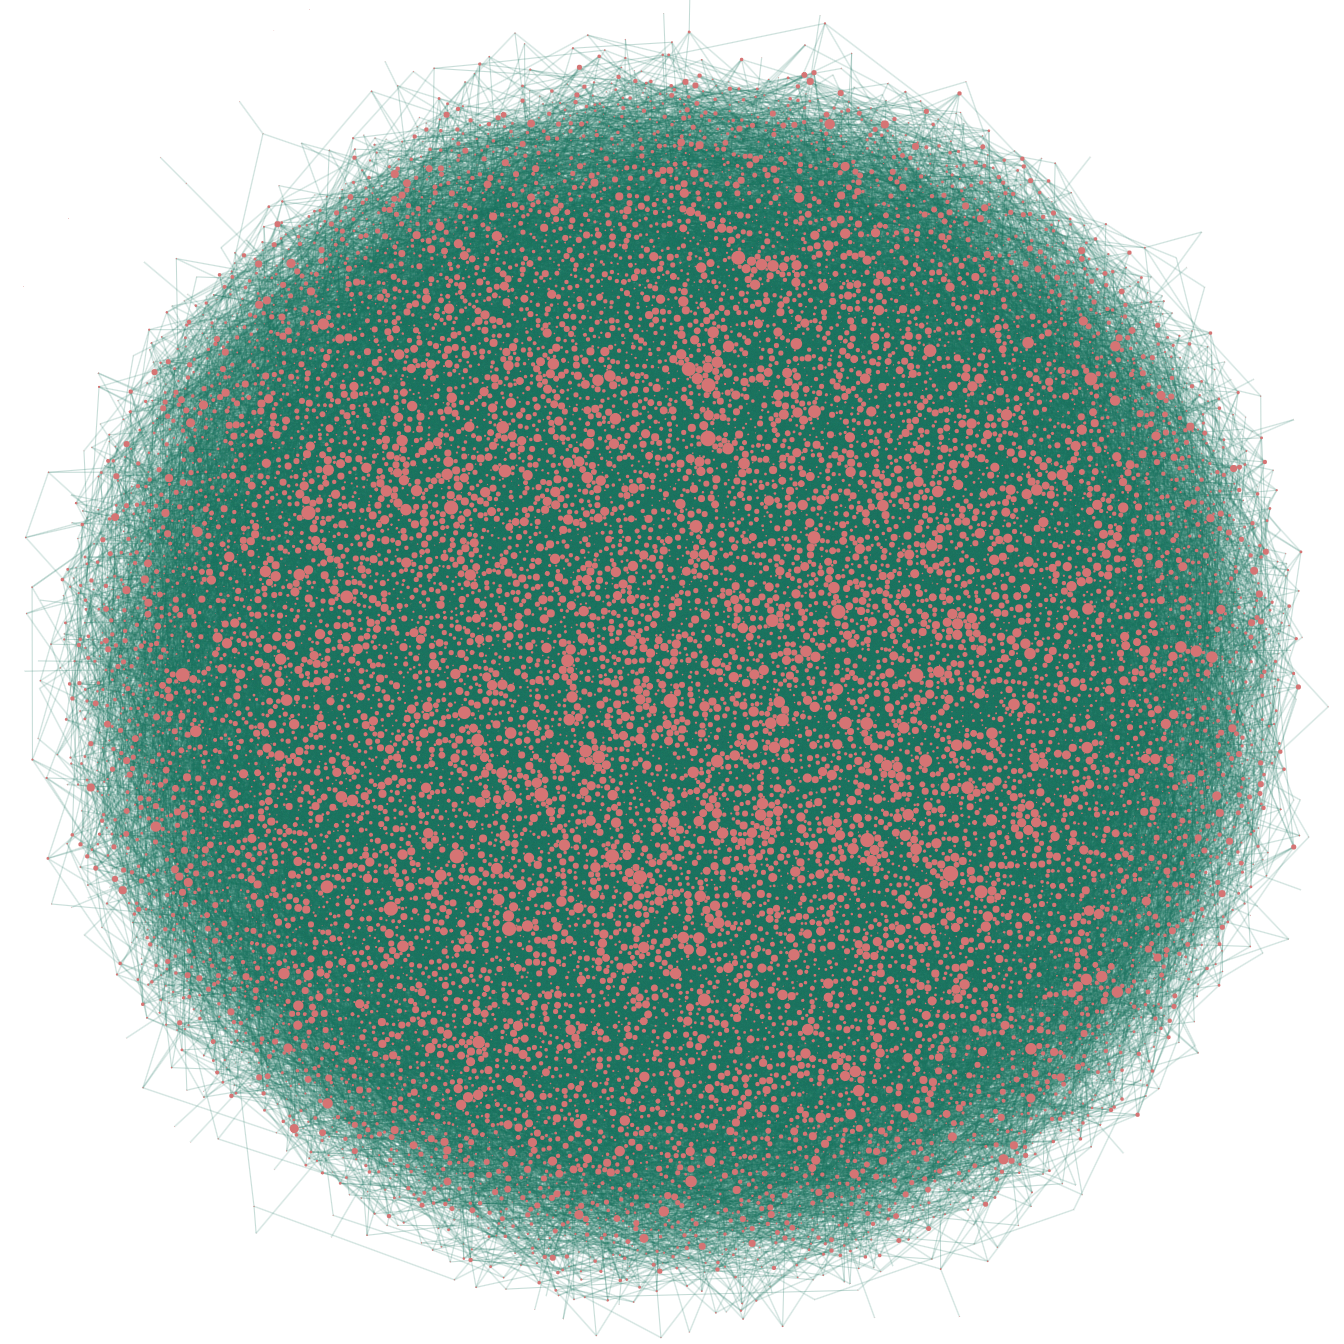

<style>
    img[alt="random_visual.png"] { 
    max-width:  800px; 
    display: block;
    }
</style>

> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

- It falls between the supercritical and connected component regime. As it is showing characteristics of both, it is indicating that is might be transitioning between the two.
- The network's structure can be described as a sparse network with a few larger/giant components that are the ecosystem and some smaller components that are resembling trees.
- The actual network exhibits few nodes with high degree, while the random network shows more a uniform degree distribution, where nodes have similar degrees. These differences align with the theoretical expectations, as random networks tend to have a homogeneous degree distribution while real-world networks often show heterogeneity due to underlying constraints. The giant component in the actual network shows the real-world interconnectedness of ecological systems.

> 2. _Degree Distribution_: This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Choose bins, and normalization strategies appropriately. **Hint:** Revisit the content from Week 3, Part 3 of the lectures.  
> * Compute the distribution of degree for the Computational Social Scientists network using the numpy function ``np.histogram``. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.
> * Plot both degree distributions on the same figure using line plots, ensuring the x and y axes are scaled in a way that allows for comparison between the two distributions.
> * Add two vertical lines showing the average degree for the random and the real network. 

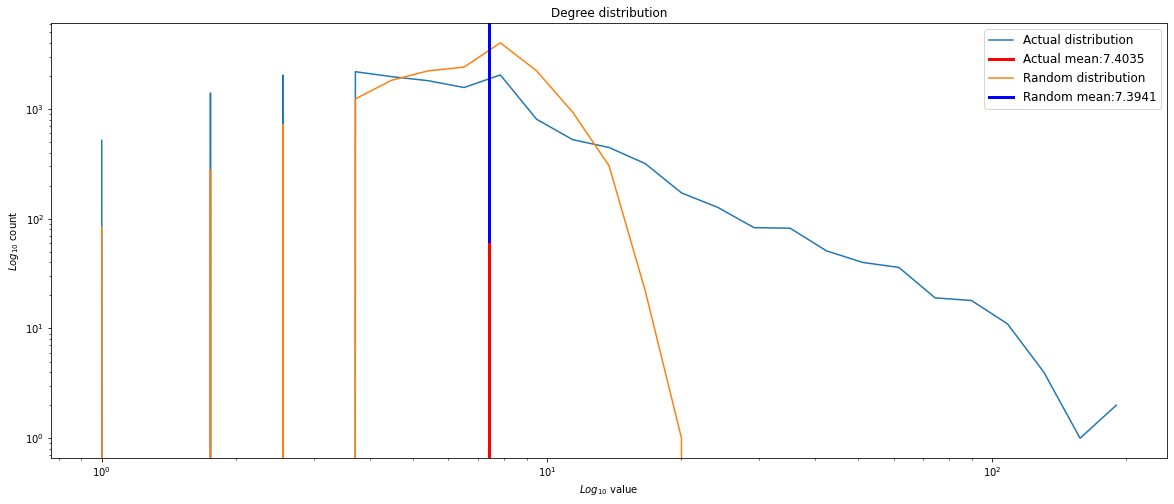

In [24]:
fig,ax = plt.subplots(1,1,figsize=(20,8))

# Actual Graph (G)
G_deg = pd.DataFrame(list(G.degree()),columns=["id","Node degree"])

bin_space = np.logspace(np.log10(G_deg["Node degree"].min()),
                        np.log10(G_deg["Node degree"].max()), 
                        30) 
G_hist, G_edges = np.histogram(G_deg["Node degree"], bins=bin_space)

ax.plot(G_edges[:-1], G_hist, label="Actual distribution")
ax.axvline(G_deg["Node degree"].mean(), ymax=0.5,linestyle="-", lw = 3, color="#f00", label=f'Actual mean:{G_deg["Node degree"].mean():.4f}')


# Random Graph (g)
g_deg = pd.DataFrame(list(g.degree()),columns=["id","Node degree"])

### Use the binspace above
g_hist, g_edges = np.histogram(g_deg["Node degree"], bins=bin_space)

ax.plot(g_edges[:-1], g_hist, label="Random distribution")
ax.axvline(g_deg["Node degree"].mean(), ymin=0.5,linestyle="-", lw = 3, color="#00f", label=f'Random mean:{g_deg["Node degree"].mean():.4f}')


ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$Log_{10}$ value")
ax.set_ylabel("$Log_{10}$ count")
ax.set_title("Degree distribution")
ax.legend(fontsize=12)
plt.show()

> * Answer the following questions __(max 200 words in total)__: 
>    - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties. 
>    - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties? (max 150 words)

- Both have roughly the same average degree which works for normal distributions but is a poor metric when it comes to heavy tailed distributions. This is because heavy-tailed distributions often contain highly connected nodes that disproportinately influence network dynamics and are not fully captured by the average degree.
- The actual network is more spread out with some extremely high nodes skewing the mean. The random network shows a more uniform distribution around the mean. Therefore' the shape of the degree distribution provides valuable insights into network properties. It shows the differences in connectivity patterns between real and random networks.

## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6. 

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**

In [7]:
G = read_json_network("graph.json")

def get_cat_assort_coeff(gg, keyword = "country"): # Assortative coefficient - categorial
    frac_edge_sum = 0
    for n1,n2 in gg.edges:
        if gg.nodes[n1][keyword] == gg.nodes[n2][keyword]:
            frac_edge_sum += 1
    frac_edge_sum /= gg.number_of_edges()

    frac_half_sum = {}
    for n,d in gg.nodes(data=True):
        frac_half_sum[d[keyword]] = frac_half_sum.get(d[keyword], 0) + gg.degree[n]

    n_stub = gg.number_of_edges()*2
    expect_n_same = sum(map(lambda a: (a/n_stub)**2, frac_half_sum.values()))

    return (frac_edge_sum - expect_n_same)/(1-expect_n_same)

r = get_cat_assort_coeff(G)
print(f"assortativity coefficient: {r}")
print(F"number of edges: {G.number_of_edges()}")

assortativity coefficient: 0.42617827718813805
number of edges: 60279


> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.
> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [11]:
def config_model(g, edge_multiplier = 10, in_tqdm = False): # Configuration model (double edge swap algo.) [faster]
    np_choice = np.random.choice
    modified_graph = g.copy()
    num_edges = int(modified_graph.number_of_edges()*edge_multiplier)
    
    for _ in tqdm(range(num_edges), leave=not in_tqdm):
                  
        while True: 
            node1, node2 = np_choice(modified_graph.nodes,size=2,replace=False)
            
            try: 
                # get a random neighbour of the node that is not the other node or the other nodes neighbour
                node1_neighbour = np_choice([n for n in modified_graph.neighbors(node1) if n != node2 and n not in modified_graph.neighbors(node2)]) # random neighbour to node 1 but not to node 2 or node 2 itself
                node2_neighbour = np_choice([n for n in modified_graph.neighbors(node2) if n != node1 and n not in modified_graph.neighbors(node1)]) # random neighbour to node 2 but not to node 1 or node 1 itself
            except: 
                # if nodes share the same neighbours -> no new connection
                continue
                
            modified_graph.remove_edges_from([(node1,node1_neighbour),(node2, node2_neighbour)])
            modified_graph.add_edges_from(   [(node1,node2_neighbour),(node2, node1_neighbour)])
            break
            
    return modified_graph

# check
g = config_model(G, edge_multiplier=10)
print("Matching degree across nodes?", dict(G.degree()) == dict(g.degree()))
print("Different edges?", G.edges != g.edges)

100%|██████████| 602790/602790 [32:53<00:00, 305.45it/s]   

Matching degree across nodes? True
Different edges? True


> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>
> __Part 4: Assortativity by Degree__
>
> 5. *Calculate degree assortativity* for your network using the formula discussed in the lecture.
> 6. *Compare your network's degree assortativity* against that of 100 random networks generated via the configuration model. Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa. 

In [9]:
def get_deg_assort_coeff(modified_graph): # Assortative coefficient - scalar (pearson correlation)
    edge_deg = []
    X = []

    for e in modified_graph.edges:
        x = modified_graph.degree(e[0])
        y = modified_graph.degree(e[1])
        edge_deg.append(x * y)
        X.append(x)
        X.append(y)
    X = np.asarray(X)
    Y = X

    r = (np.mean(edge_deg) - np.mean(X) * np.mean(Y)) / np.sqrt(np.mean(X**2) - np.mean(X)**2) / np.sqrt(np.mean(Y**2) - np.mean(Y)**2)
    return r

def get_coeff(modified_graph): # get both categorial and scalar (deg)
    r  = get_cat_assort_coeff(modified_graph)
    r2 = get_deg_assort_coeff(modified_graph)
    return (r,r2)

In [4]:
# r_list = Parallel(n_jobs=20)(delayed(lambda: get_coeff(config_model(G, E_mul=10, in_tqdm=True)))() for _ in tqdm(range(100)))

# output from the random 100 network calculations
r_list = [(-0.0016515690889501908, -0.015169781458325102), (-0.00011723512641972084, -0.014199650571717775), (-0.0021694068013042114, -0.01095658679597443), (-0.003070828004290857, -0.01266936343847845), (0.001743144803148473, -0.019960158326779227), (0.0009376194728199753, -0.01942827694498009), (-0.000961118805811497, -0.012717476489123244), (-0.0015556732162920425, -0.014591618243033028), (0.0004389609349975781, -0.013383429126683685), (0.0014554571851739958, -0.01232753623679756), (-0.00027066852267277106, -0.014580216736242244), (0.0017239656286168175, -0.014100655844496338), (-0.002552990291936837, -0.01927214388257965), (0.0006691110293771214, -0.01559547404552038), (0.00017045249155472423, -0.020010909202130854), (7.455661889657587e-05, -0.021476929333421452), (0.00017045249155472423, -0.019553540918249103), (0.0006691110293771214, -0.015168604247298843), (0.0004964984585924479, -0.012594218134639595), (3.619826983332937e-05, -0.008989118367932288), (-0.00015559347548299945, -0.01614516619414181), (0.0015705322323637673, -0.022870376584967482), (0.0005540359821873497, -0.017980023980103368), (0.0005540359821873497, -0.013719828077521614), (0.0007650069020353019, -0.014091390757716083), (0.000573215156718973, -0.014432149749391741), (0.0011102320436046488, -0.011551775970737954), (-0.002917394608037839, -0.01536820691685181), (0.00040060258593429957, -0.013330890634588612), (0.002107549119249443, -0.009335807015147284), (0.0014938155342372743, -0.0188052925098758), (-0.001172089725659417, -0.017437155295392998), (0.001263665439857699, -0.014815811542911008), (-0.0030132904806959874, -0.009032151971000983), (0.002184265817375968, -0.019246027237961445), (0.001762323977680096, -0.014452641941329203), (0.0020883699447178197, -0.014209438863398614), (0.0008225444256301715, -0.016253665810389627), (-0.00027066852267277106, -0.011255576596424255), (0.0028171785769197924, -0.010797031101516391), (0.0026829243551983652, -0.01105948375974571), (-0.0013638814709757137, -0.010339859019472349), (-0.0010186563294063667, -0.010624460685157554), (0.0002663483642129047, -0.014390358757961703), (-0.001517314867228764, -0.016679576399626896), (0.0027404618787932673, -0.01425373687831032), (-0.0013447022964440905, -0.015986678709689), (0.00020881084061800283, -0.011908601712900797), (0.0017047864540851942, -0.021611349392449835), (-0.000404922744394198, -0.011535643819638225), (-0.0014789565181655175, -0.019694152235267076), (9.373579342819913e-05, -0.015456039939528664), (-0.00019395182454624594, -0.011200051476355343), (0.0008609027746934502, -0.014633278433237902), (0.0013212029634525686, -0.013367863780892879), (-7.887677735647434e-05, -0.01799151268771083), (-0.001172089725659417, -0.015649887355175727), (-0.00015559347548299945, -0.016206119565053828), (0.0012444862653260436, -0.013232767915534691), (0.0004964984585924479, -0.017344003022894145), (0.0012061279162627972, -0.015752021311800448), (0.0008609027746934502, -0.018779481068116263), (-0.0014022398200389922, -0.02339798512674564), (0.0032199412420840412, -0.01375361839401426), (0.0008609027746934502, -0.017261881653714787), (0.0018582198503382444, -0.01651437445228391), (-0.0003282060462676729, -0.0087192318400745), (-0.0003665643953309194, -0.016323055860322722), (-0.0005008186170523464, -0.016630438739385286), (-0.00042410191892582126, -0.020231549068726002), (0.0006499318548454982, -0.02283776347950102), (0.0013020237889209455, -0.010906162923685677), (-0.0005583561406472483, -0.012427206770348956), (0.0006499318548454982, -0.010105986428934562), (0.0033733746383370912, -0.016718947568391946), (0.0004389609349975781, -0.005203774512991701), (0.0006499318548454982, -0.016277842236835083), (0.001896578199401491, -0.013104626315312723), (0.001743144803148473, -0.016254254415902756), (-0.00011723512641972084, -0.013512617136706744), (-0.0015364940417604194, -0.013938898329415153), (-0.0017858233106716177, -0.014601144932263537), (-0.0005775353151788715, -0.012123137522323102), (-4.0518428293195737e-05, -0.019655653074669616), (-0.0002514893481411478, -0.016290944159552564), (0.0002279900151496261, -0.017138710500047886), (0.0016088905814270458, -0.02367901155894388), (0.001417098836110749, -0.0240357719004941), (-0.00023231017360952455, -0.0137197844771132), (-0.0008076854095584468, -0.01192283724623612), (-0.0007885062350267914, -0.0162069261726088), (0.00032388588780777445, -0.016880290879593505), (0.004102183270539064, -0.021315782224057608), (-0.001805002485203241, -0.010474584281359325), (0.0004964984585924479, -0.016321573446437868), (0.0006499318548454982, -0.019180713826211695), (-0.0014981356926971406, -0.011379924961117411), (0.0008225444256301715, -0.018783448705278576), (0.0007074693784404, -0.017356385538873403), (-0.000750147885963545, -0.01427540628127404)]
r_cat,r_deg  = np.asarray(r_list).T

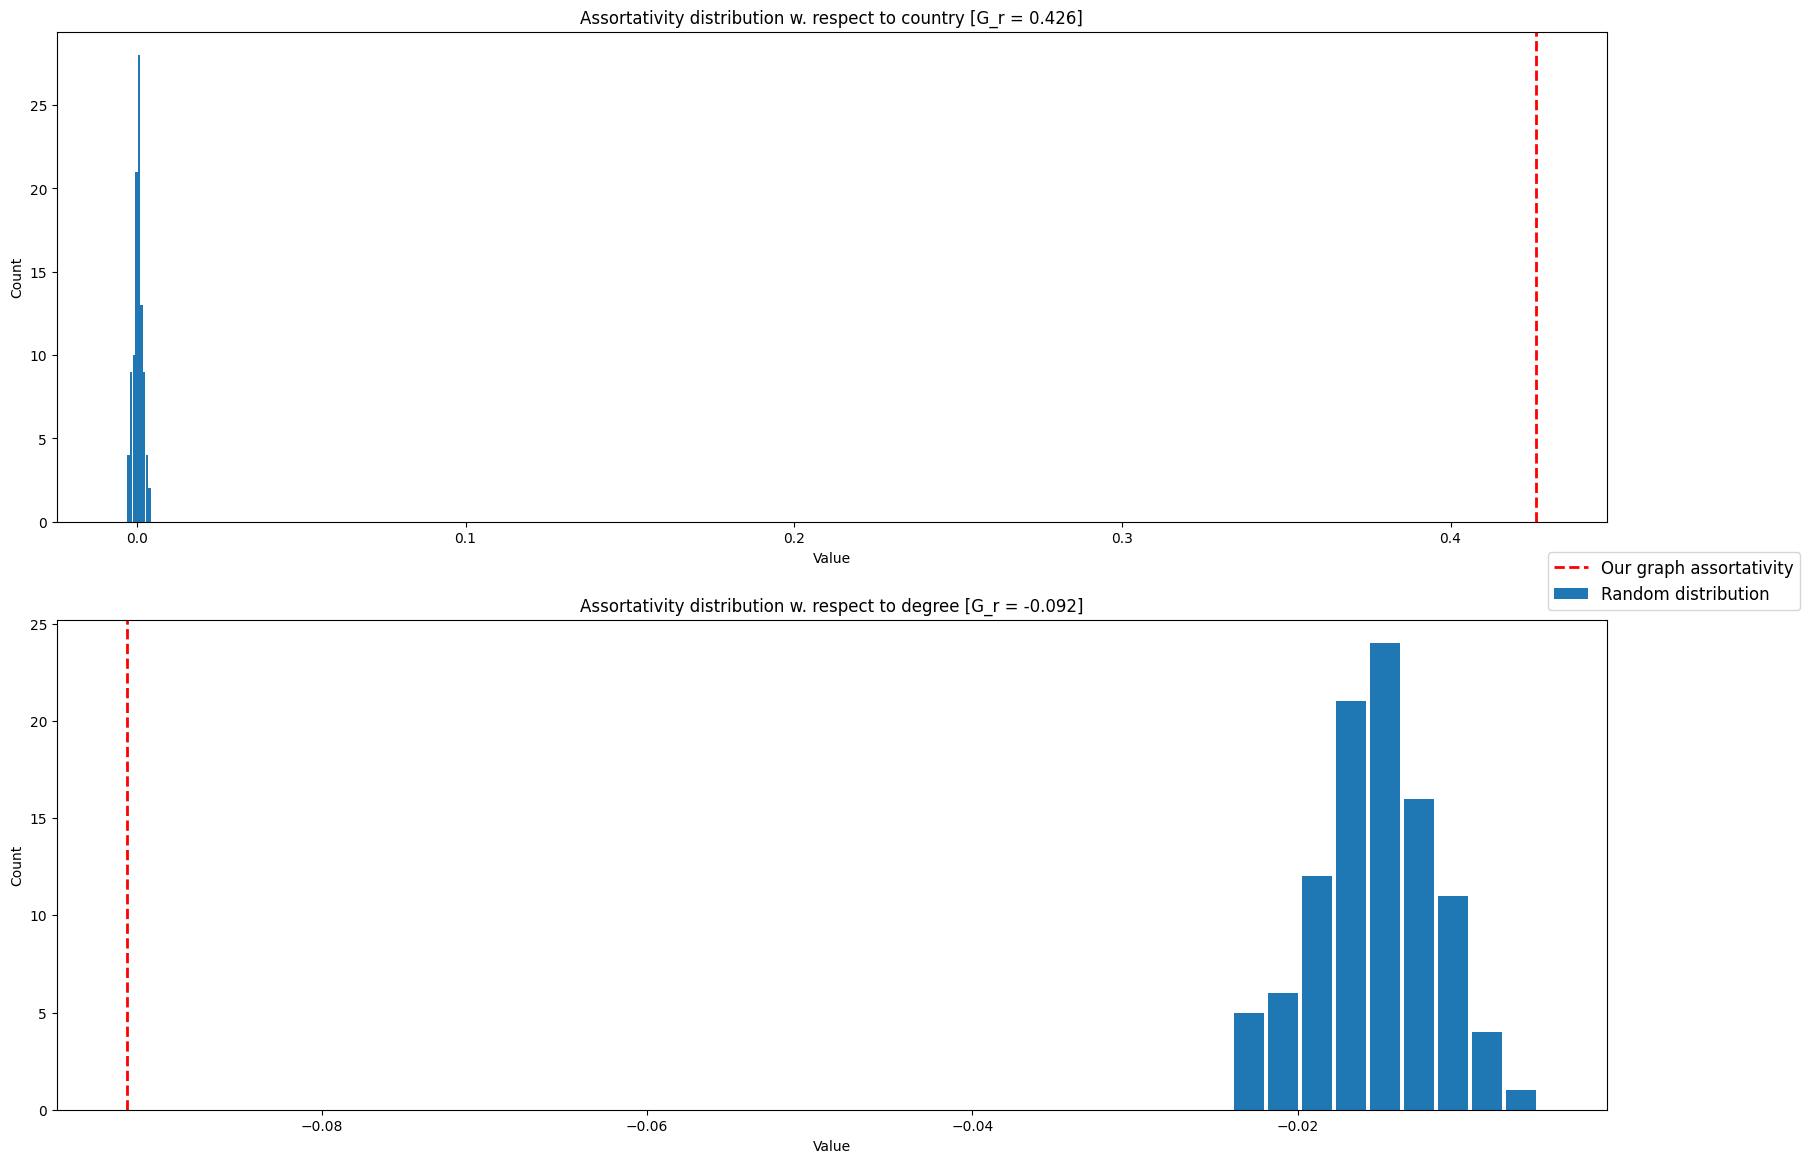

In [11]:
fig,ax = plt.subplots(2,1,figsize=(20,14))

# categorial with respect to country
bin_space = np.linspace(min(r_cat),
                        max(r_cat), 
                        10) 
hist,edges = np.histogram(r_cat, bins=bin_space)
xbar = (edges[:-1]+edges[1:])/2 # get midpoints between edges
width = bin_space[1:]-bin_space[:-1]
ax[0].bar(xbar,hist,width=width*.9, label="Random distribution")
ax[0].axvline(get_cat_assort_coeff(G), linestyle="--", lw = 2, color="#f00", label="Our graph assortativity")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Count")
ax[0].set_title(f"Assortativity distribution w. respect to country [G_r = {get_cat_assort_coeff(G):.3f}]")

# categorial with respect to degree
bin_space = np.linspace(min(r_deg),
                        max(r_deg), 
                        10) 
hist,edges = np.histogram(r_deg, bins=bin_space)
xbar = (edges[:-1]+edges[1:])/2 # get midpoints between edges
width = bin_space[1:]-bin_space[:-1]
ax[1].bar(xbar,hist,width=width*.9)
ax[1].axvline(get_deg_assort_coeff(G), linestyle="--", lw = 2, color="#f00")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Count")
ax[1].set_title(f"Assortativity distribution w. respect to degree [G_r = {get_deg_assort_coeff(G):.3f}]")

fig.legend(loc="right",fontsize=12)
plt.show()

> __Part 5: Reflection questions (max 250 words for the 3 questions)__    
> 7. *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?    
> 8. *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing *e_1* from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?    
> 9. *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.    

- Our graph assortativity by degree is G_r = -0.092 which is close to 0 and indicates that a scientist's number of connection doesn't lead to others with equal amount of connection. This is expected as scientist does not collaborate with other based on who they have worked with but on their expertise.
- The edges are likely sorted and therefore nodes on the left side of the sorting list would more likely connect to nodes on the right side and vice versa. This would add bias based on node name (id) which should be independent.
- The distributions follows a generic normal distribution with mean close to 0 and is to be expected. Depending on the network generation, a set of random networks with some similarity to our own network would be a better indicator for our theoretical expectations on the network. The configuration model with edge flipping keeps the individual node degree constant while changing their neighbours. This allows analysis on connections between nodes with few and many neighbours and a meaninful inference can be drawn. 

> **Exercise 2: Central nodes.** Remember to write your answers in the notebook. 
> * Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play? 
> * Find the 5 most central scientists according to eigenvector centrality.     
> * Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?    
> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

In [8]:
ccentrality = nx.closeness_centrality(G)
print("Done computing closeness_cenrtality")
ecentrality = nx.eigenvector_centrality(G)
print("Done computing closeness_cenrtality")
ccentrality = dict(sorted(ccentrality.items(), key=lambda x:x[1], reverse=True))
ecentrality = dict(sorted(ecentrality.items(), key=lambda x:x[1], reverse=True))

Done computing closeness_cenrtality
Done computing closeness_cenrtality


Top 5 c-centrality:
Id: A5010495671  Deg:  113  c-centrality:0.23223543568975766  Info:{'display_name': 'Nicholas A. Christakis', 'country': 'US', 'first_publish': 1991}
Id: A5034372799  Deg:  101  c-centrality:0.23190410339675854  Info:{'display_name': 'Renaud Lambiotte', 'country': 'GB', 'first_publish': 2005}
Id: A5021346979  Deg:  104  c-centrality:0.23179031510062872  Info:{'display_name': 'Filippo Menczer', 'country': 'US', 'first_publish': 1992}
Id: A5067118505  Deg:   87  c-centrality:0.23174056782691824  Info:{'display_name': 'Alex Pentland', 'country': 'US', 'first_publish': 1991}
Id: A5048877432  Deg:   98  c-centrality:0.2310498728321723  Info:{'display_name': 'Bruno Lepri', 'country': 'IT', 'first_publish': 2006}
Top 5 e-centrality:
Id: A5046546654  Deg:   78  e-centrality: 0.1821179112254766  Info:{'display_name': 'Alessandro Vespignani', 'country': 'IT', 'first_publish': 1995}
Id: A5033081182  Deg:  102  e-centrality: 0.17699267598638355  Info:{'display_name': 'José J. R

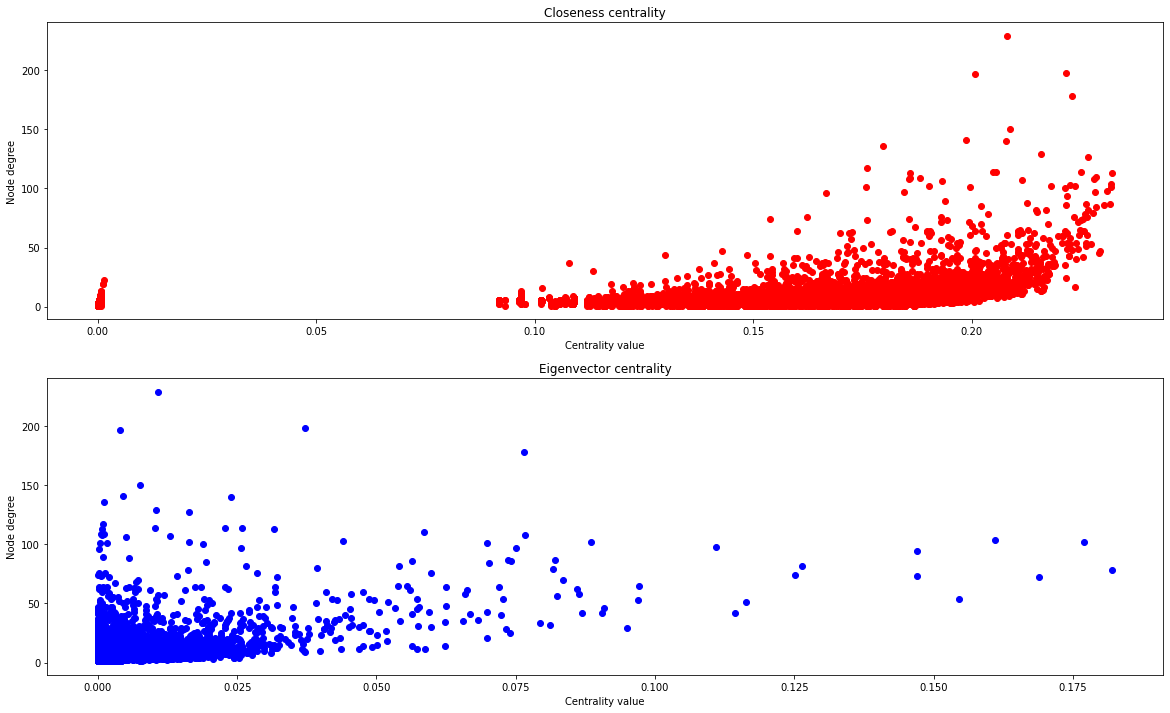

In [11]:
print("Top 5 c-centrality:")
for id in list(ccentrality.keys())[:5]:
    print(f"Id: {id}  Deg: {G.degree(id):>4}  c-centrality:{ccentrality[id]}  Info:{G.nodes[id]}")
print("Top 5 e-centrality:")
for id in list(ecentrality.keys())[:5]:
    print(f"Id: {id}  Deg: {G.degree(id):>4}  e-centrality: {ecentrality[id]}  Info:{G.nodes[id]}")

fig,ax = plt.subplots(2,1,figsize=(20,12))
for n in G.nodes:
    ax[0].plot(ccentrality[n],G.degree(n),'ro')
    ax[1].plot(ecentrality[n],G.degree(n),'bo')
ax[0].set_title("Closeness centrality")
ax[0].set_xlabel("Centrality value")
ax[0].set_ylabel("Node degree")
ax[1].set_title("Eigenvector centrality")
ax[1].set_xlabel("Centrality value")
ax[1].set_ylabel("Node degree")
plt.show()

* Scientist with high closeness centrality have an easier time to reach all the other scientist
* The higher the closeness centrality, the higher is the average degree. This is expected as with higher degree would reach nodes which potentially could reduce the the average shortest distance. 
* The eigenvector centrality shows that high degree doesn't nessesarily lead to other degress which are also high. There is no correlation and quite unexpected.

## Part 3 - Words that characterize Computational Social Science communities

**Exercise 1**
> What is the point of TF-IDF
> - TF-IDF is useful as a measure of how important a word is to a corpus or collection of documents, by both taking account of how often it appears and keeping in mind that some words appear more frequently than others. This means that unique words of high importance to a corpus will have a larger value and less significant common words will have a smaller value.

> What does TF stand for?
> - TF stands for term frequency. It is a measure of how often a term appears within a corpus, relative to the total number of terms, and is therefore a relative frequency.

> What does IDF stand for?
> - IDF stands for inverse document frequency. It is a measure of how rare a word is across a corpus of documents, logarithmically scaled.

**Exercise 1.2**

Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 

In [14]:
# Load data, removing NaN values if something is missing
authors = pd.read_csv("combined_authors_community.csv").dropna()
papers = pd.read_csv("papers.csv").dropna()
abstracts = pd.read_csv("abstracts_tokens.csv").dropna()

# Make sure that author_ids in papers is of type list and not str
papers["author_ids"] = papers["author_ids"].apply(ast.literal_eval)

# Make sure that tokens in abstracts is of type list and not str
abstracts["tokens"] = abstracts["tokens"].apply(ast.literal_eval)

# Explode papers to have one row per author
papers = papers.explode("author_ids")

In [15]:
# Define function for creating the community documents

def create_community_document(author_ids : list):
    # Find all papers written by authors in author_ids
    community_papers = []
    for author in author_ids:
        # Get papers written by author
        papers_written = papers[papers["author_ids"] == author]["id"]
        # Get tokenized abstracts of papers written by author
        for paper in papers_written:
            if paper not in community_papers:
                community_papers.append(paper)
    # Find all the abstract tokens of the papers
    community_abstract_tokens = []
    for paper in community_papers:
        abstract_tokens = abstracts[abstracts["id"] == paper]["tokens"].to_list()
        for token_list in abstract_tokens:
            for token in token_list:
                community_abstract_tokens.append(token)
    return community_abstract_tokens

In [30]:
# Create the documents
community_tokens = authors.groupby("community").apply(lambda x: create_community_document(x["id"].tolist()), include_groups=False)

**Exercise 1.3**

Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 

In [31]:
# Define functions for finding TF-IDF scores

def term_frequency(tokens : list):
    # Find the frequency of each token
    frequency = nltk.FreqDist(tokens)
    # Find the total number of tokens
    total_tokens = len(tokens)
    # Find the frequency of each token
    term_frequency = {token : frequency[token] / total_tokens for token in frequency}
    return term_frequency

def inverse_document_frequency(documents : list):
    # Find the number of documents
    number_of_documents = len(documents)
    # Find the number of documents containing each token
    document_frequency = {}
    for document in documents:
        for token in set(document):
            if token not in document_frequency:
                document_frequency[token] = 1
            else:
                document_frequency[token] += 1
    # Find the inverse document frequency of each token
    inverse_document_frequency = {token : np.log10(number_of_documents / document_frequency[token]) for token in document_frequency}
    return inverse_document_frequency

def tf_idf(term_frequency : dict, inverse_document_frequency : dict):
    # Find the TF-IDF score of each token
    tf_idf = {token : term_frequency[token] * inverse_document_frequency[token] for token in term_frequency}
    return tf_idf

community_term_frequency = community_tokens.apply(term_frequency)

In [32]:
# Find the top 5 communities by author count
top_5_communities = authors["community"].value_counts().head(5).index.to_list()
print(f"Top 5 communities: {top_5_communities}")

top_5_community_tokens = community_tokens.loc[top_5_communities].copy()

print(f"Tokens from top 5 communities: {top_5_community_tokens}")

# Find TF and IDF scores for the top 5 communities
top_5_community_term_frequency = community_term_frequency.loc[top_5_communities].copy()

Top 5 communities: [1.0, 18.0, 25.0, 106.0, 5.0]
Tokens from top 5 communities: community
1.0      [thi, paper, examin, determin, social, distanc...
18.0     [latent, variabl, model, potenti, add, valu, l...
25.0     [investig, growth, c, facet, good, qualiti, he...
106.0    [thi, paper, investig, task, offload, problem,...
5.0      [loneli, wide, affect, mental, health, symptom...
dtype: object


Top 5 terms by TF for each of the top 5 communities

In [33]:
# Find top TF scores
top_5_community_tf = top_5_community_term_frequency.apply(lambda x: {token : x[token] for token in sorted(x, key = x.get, reverse = True)[:5]})
print(f"Top 5 token TF scores for community 1: {top_5_community_tf[1.0]}")
print(f"Top 5 token TF scores for community 18: {top_5_community_tf[18.0]}")
print(f"Top 5 token TF scores for community 25: {top_5_community_tf[25.0]}")
print(f"Top 5 token TF scores for community 106: {top_5_community_tf[106.0]}")
print(f"Top 5 token TF scores for community 5: {top_5_community_tf[5.0]}")

Top 5 token TF scores for community 1: {'network': 0.01355826215482569, 'social': 0.013487202080638971, 'thi': 0.011014311498941205, 'model': 0.010573739038983556, 'use': 0.008299816665008598}
Top 5 token TF scores for community 18: {'thi': 0.01352823283373998, 'network': 0.009868421052631578, 'social': 0.009302021610317185, 'model': 0.009084175670965493, 'use': 0.008169222725688393}
Top 5 token TF scores for community 25: {'network': 0.012965417520183155, 'thi': 0.012869020363899265, 'social': 0.009977105675382576, 'model': 0.008290155440414507, 'data': 0.008025063260633812}
Top 5 token TF scores for community 106: {'control': 0.013241928868576785, 'thi': 0.013183336262963615, 'propos': 0.012128669361926525, 'system': 0.011425558094568465, 'model': 0.009726372531786489}
Top 5 token TF scores for community 5: {'thi': 0.012295914910913894, 'social': 0.010974866201476864, 'network': 0.010399024456337646, 'user': 0.00978930966736671, 'use': 0.009518325316712959}


> Describe similarities and differences between the communities.
> * The first three communities contain the same words, but at different frequencies, where the latter two communities contain at least one different word from the first three. The clearly all relate to some kind of social network, social science and some kind of mode through the usage of the words "network", "social" and "model". The communities have few differences between them.

> Why aren't the TFs not necessarily a good description of the communities?
> * The TFs might not be a good description since it does not take the semantics of the terms into account and is prone to standard or common words having a high TF. In this case, we see that the word "model", a common word in many sciences, is very common. The same is the word "this" (stemmed to "thi"), which is simply a common word in the english language, and does not tell us anything about the communities.

Next, we calculate IDF for every word. 

> What base logarithm did you use? Is that important?
> * The used logarithm is the natural logarithm which is in base e, as this one is easier to understand if further mathematical computations were to be performed due to it's ease of derivative. The natural logarithm is also used in information theory.

In [34]:
# Calculate the IDF for every word
idf = inverse_document_frequency(community_tokens)

**Exercise 1.4** 

We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors).

In [35]:
# Find the top 9 communities by author count
top_9_communities = authors["community"].value_counts().head(9).index.to_list()
print(f"Top 9 communities: {top_9_communities}")

top_9_community_tokens = community_tokens.loc[top_9_communities].copy()

print(f"Tokens from top 9 communities: {top_9_community_tokens}")

# Find TF and IDF scores for the top 9 communities
top_9_community_term_frequency = community_term_frequency.loc[top_9_communities].copy()

# Calculate TF-IDF
community_tf_idf = top_9_community_term_frequency.apply(lambda x: tf_idf(x, idf))

Top 9 communities: [1.0, 18.0, 25.0, 106.0, 5.0, 28.0, 34.0, 23.0, 57.0]
Tokens from top 9 communities: community
1.0      [thi, paper, examin, determin, social, distanc...
18.0     [latent, variabl, model, potenti, add, valu, l...
25.0     [investig, growth, c, facet, good, qualiti, he...
106.0    [thi, paper, investig, task, offload, problem,...
5.0      [loneli, wide, affect, mental, health, symptom...
28.0     [billion, user, onlin, social, network, repres...
34.0     [numer, model, dynam, respons, analysi, motion...
23.0     [introduc, friend, famili, studi, longitudin, ...
57.0     [studi, easi, distinguish, influenc, oper, org...
dtype: object


Then for each community:
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)

In [36]:
# Define function for finding the top 3 authors for a community
def find_top_3_authors(authors):
    # Find the top 3 authors
    top_3_authors = authors.sort_values(by = "degree", ascending = False).head(3)
    top = top_3_authors[["display_name", "degree"]]
    return top

In [37]:
# Define function for listing top 10 TF words, top 10 TF-IDF words, and top 3 authors by degree
def top_10_tf_top_10_tf_idf_top_3_authors(communities : list):
   top_10_tf = top_9_community_term_frequency.apply(lambda x: {token : x[token] for token in sorted(x, key = x.get, reverse = True)[:10]})
   top_10_tf_idf = community_tf_idf.apply(lambda x: {token : x[token] for token in sorted(x, key = x.get, reverse = True)[:10]})
   top_authors = authors.groupby("community").apply(find_top_3_authors)
   for community in communities:
      print(f"Scores for community {community}:")
      print(f"Top 10 token TF scores for community {community}: {top_10_tf[community]}")
      print(f"Top 10 token TF-IDF scores for community {community}: {top_10_tf_idf[community]}")
      print(f"Top 3 authors by degree for community {community}: {top_authors.loc[community]}")
      print("-------------------------------------------------------")

In [38]:
# Display the results
top_10_tf_top_10_tf_idf_top_3_authors(top_9_communities)

Scores for community 1.0:
Top 10 token TF scores for community 1.0: {'network': 0.01355826215482569, 'social': 0.013487202080638971, 'thi': 0.011014311498941205, 'model': 0.010573739038983556, 'use': 0.008299816665008598, 'data': 0.007575003908304081, 'studi': 0.006366982647129884, 'user': 0.00635277063229254, 'inform': 0.0057842900387988, 'differ': 0.0053437175788411525}
Top 10 token TF-IDF scores for community 1.0: {'network': 0.004519223183334119, 'social': 0.0038275136738508448, 'user': 0.0029799483379833016, 'epidem': 0.0026736291594161308, 'model': 0.0024081842019288554, 'bot': 0.0023753602130742405, 'dynam': 0.0021663055175665208, 'spread': 0.0021627552596133544, 'commun': 0.002063359774418618, 'media': 0.001959128662579288}
Top 3 authors by degree for community 1.0:           display_name  degree
15459  Filippo Menczer   104.0
15856     Alain Barrat    94.0
16049   Emilio Ferrara    86.0
-------------------------------------------------------
Scores for community 18.0:
Top 10 t

/tmp/ipykernel_202753/1176741724.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_authors = authors.groupby("community").apply(find_top_3_authors)


> Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?
> * The words with highest TF-IDF are clearly a lot more descriptive than the TF-words. As seen previously, the TF words were all very similar across the communities, since they were simply common words appearing frequently. The inclusion of IDF and how common a word generally is, means that we can actually see sort of what the community is working with from the TF-IDF words, as they now differ greatly for each community, only generally sharing words like "network", "social" and "model", which is expected from social science.

**Exercise 2: Wordcloud visualization**

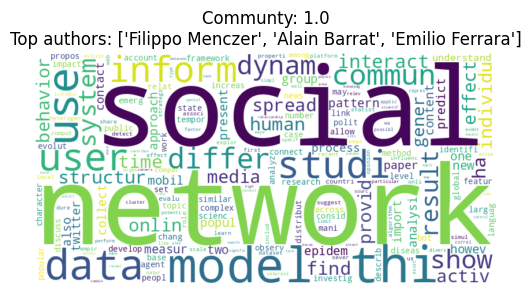

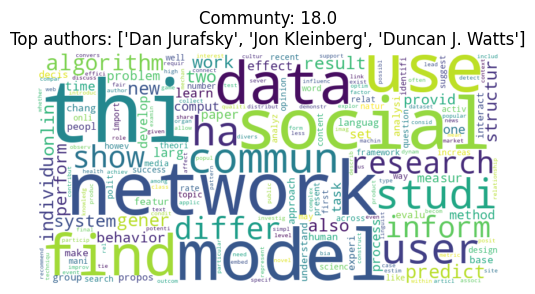

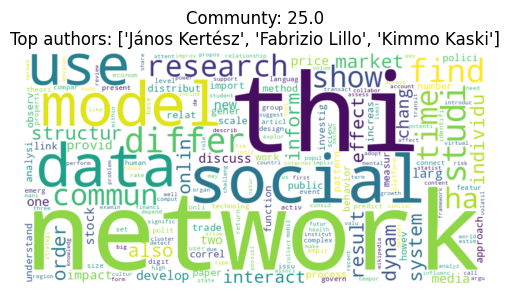

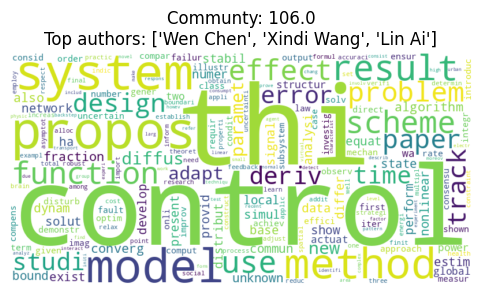

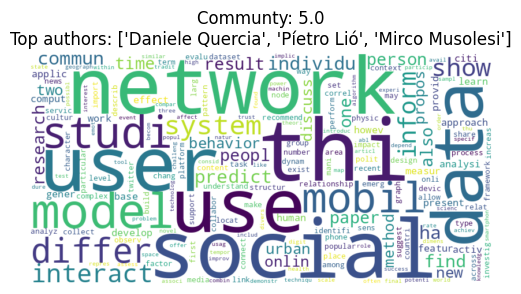

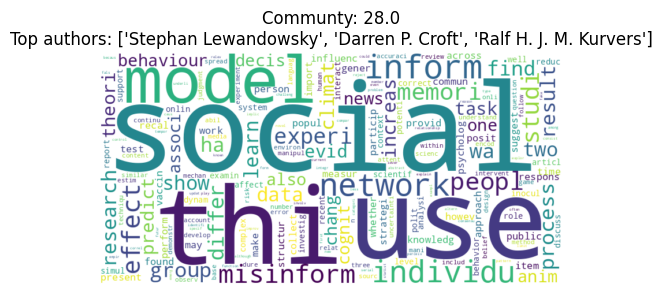

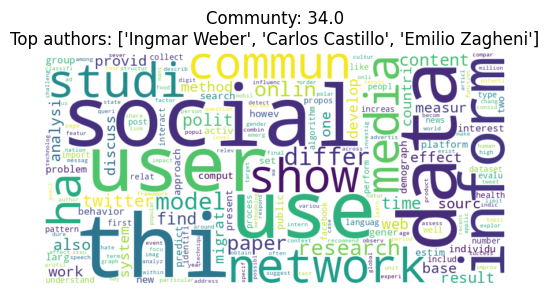

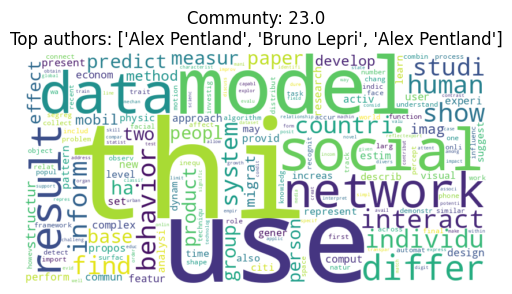

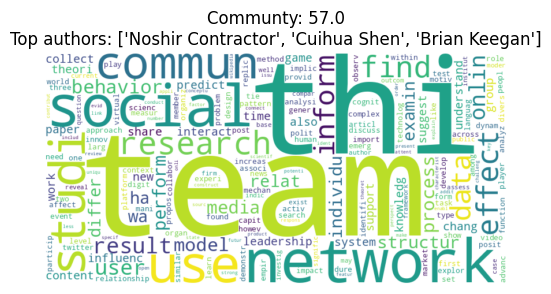

In [39]:
# Define function for creating a word cloud
def create_word_cloud(tokens : list):
    # Find the frequency of each token
    frequency = nltk.FreqDist(tokens)
    # Create a word cloud
    cloud = wordcloud.WordCloud(width = 800, height = 400, background_color = "white").generate_from_frequencies(frequency)
    return cloud

# Define a function for plotting the word cloud
def plot_word_cloud(cloud : wordcloud.WordCloud, top_authors, community_idx):
    plt.figure(figsize = (6, 3))
    plt.imshow(cloud, interpolation = "bilinear")
    plt.axis("off")
    plt.title(f"Communty: {community_idx}\nTop authors: {top_authors}")
    plt.show()

top_authors = authors.groupby("community").apply(find_top_3_authors, include_groups=False)

# Create a word cloud for the top 9 communities
top_9_community_word_clouds = top_9_community_tokens.apply(create_word_cloud)
for community in top_9_communities:
    plot_word_cloud(top_9_community_word_clouds[community], top_authors.loc[community, "display_name"].to_list(), community)

> * The wordsclouds show the top 9 communities. They tell us something about the subtle differences between the sub-communities. The word social is very common across them, and so is network and model. However, some have social and media, some have social and team, some have social and network. One community has control as a top word.

> Look up online the top author in each community. In light of your search, do your results make sense?
> * Looking up the top author for community 1 and 106, which respectively are characterized by "social, network, model" and "control, system". Looking up the top author of community 1, Filippo Menczer, his work is focused on social networks, social media and data science, which perfectly matches the community. Looking up the top author of community 106, Wen Chen, works on system control and modeling, which also matches the community. The results make great sense.

> In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__
> * The field of social science is very broad, where originally we believed it was mostly concerned with the study of social interactions as a broad description. However, the fact that so many communities could be made with differing main topics proves the broadness of the field. Our understanding of the size of the field has changed too, since it was possible to collect such a large number of authors and papers which all relate to the field, which all had many similar ideas, which is natural for papers in the same field, but also differed greatly in content, as proven by this analysis.